In [3]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [4]:
def init():   # 讀檔初始化函数

    # the knapsack capacity.
    file = open('p06_c.txt', 'r')
    knapsack_threshold = int(file.read())
    file.close()
    
    # the weights of the objects. 
    file = open('p06_w.txt', 'r')
    for line in file.readlines():        
        weight.append(int(line))
    file.close

    # the profits of each object.
    file = open('p06_p.txt', 'r')
    for line in file.readlines():        
        value.append(int(line))
    file.close
    
    return knapsack_threshold,value,weight

In [5]:
#設定初始參數
solutions_per_pop = 50
mutation_rate = 0.4
crossover_rate = 0.8
num_generations = 100

item_number = np.arange(1,8)
pop_size = (solutions_per_pop, item_number.shape[0])
print('Population size = {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
print('Initial population: \n{}'.format(initial_population))

Population size = (50, 7)
Initial population: 
[[0 0 1 0 1 0 0]
 [1 0 0 0 0 1 1]
 [1 1 1 0 1 0 0]
 [1 1 0 1 1 0 0]
 [0 1 1 0 0 0 0]
 [0 0 0 1 1 1 1]
 [1 1 0 1 1 1 1]
 [1 0 0 1 0 1 0]
 [1 0 1 1 1 0 1]
 [1 0 0 0 1 0 1]
 [0 1 0 1 0 0 1]
 [0 1 1 1 1 1 1]
 [0 0 1 0 1 1 0]
 [1 1 1 0 1 0 0]
 [1 1 1 1 1 0 0]
 [1 0 1 0 0 1 1]
 [0 0 0 1 1 0 0]
 [1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 1 0 1 1]
 [0 0 1 1 0 0 0]
 [1 1 1 0 1 0 1]
 [0 1 1 0 1 0 0]
 [0 0 1 1 0 0 1]
 [0 0 1 1 1 0 0]
 [1 1 0 0 0 1 1]
 [1 1 0 0 1 0 1]
 [1 0 1 1 1 0 1]
 [1 0 0 1 0 1 1]
 [1 1 1 0 0 1 1]
 [1 1 0 1 1 1 1]
 [1 1 1 0 0 1 1]
 [0 0 1 1 1 1 0]
 [0 1 0 0 1 1 0]
 [1 1 1 0 1 0 1]
 [0 1 1 1 0 1 1]
 [0 0 1 0 1 0 1]
 [0 0 1 0 1 1 0]
 [0 1 1 0 0 0 0]
 [1 0 0 1 0 1 1]
 [0 1 0 1 1 0 1]
 [1 1 1 1 0 1 1]
 [1 0 0 0 1 1 0]
 [1 0 0 0 1 0 1]
 [1 1 0 1 0 0 1]
 [1 0 0 0 1 1 0]
 [0 0 0 1 1 0 0]
 [1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1]]


In [6]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int) 

In [7]:
#選擇出一組解，接著再進行兩兩交配。
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [8]:
#將選出的那些解兩兩進行交配
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings  

In [9]:
#隨機選擇一些變數使得0變1、1變0
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants 

In [10]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
        
    #print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    #print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [11]:

weight = []
value = []

num_generations = 100

knapsack_threshold, value, weight = init()

print("knapsack_threshold:", knapsack_threshold)
print("value:", value)
print("weight:",weight)


item_number = len(weight) 
print("item 數:",item_number)

parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('\nThe optimized parameters for the given inputs are: \n{}'.format(parameters))
selected_items = item_number * parameters

print('\nSelected items that will maximize the knapsack without breaking it:')

cnt = 0

for i in parameters[0]:
    if(i == 1):
      print("weight: {}, value: {}". format(weight[cnt], value[cnt]))
    cnt = cnt + 1




knapsack_threshold: 170
value: [442, 525, 511, 593, 546, 564, 617]
weight: [41, 50, 49, 59, 55, 57, 60]
item 數: 7

The optimized parameters for the given inputs are: 
[array([          0,           0, -2147483648,           0,           0,
                 0,    18874368])]

Selected items that will maximize the knapsack without breaking it:


C:\Users\young\AppData\Local\Temp\ipykernel_15264\2162538864.py:12: RuntimeWarning: invalid value encountered in cast
  population[parents.shape[0]:, :] = mutants


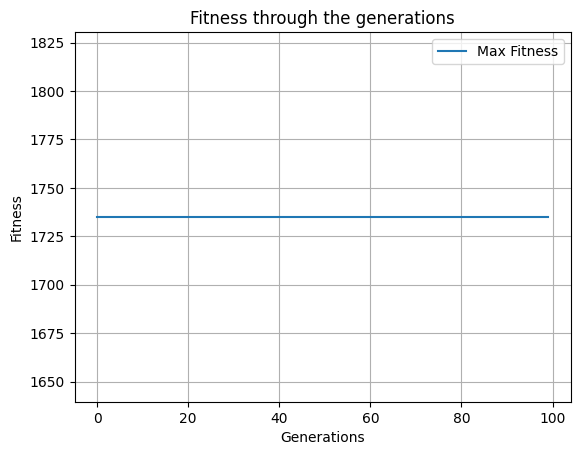

(100, 50)


In [12]:
#繪製收斂圖
#fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
#plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid()
plt.show()
print(np.asarray(fitness_history).shape)